# Electron Paramagnetic Resonance -- 
Microwave Pulse Experiment Description (Vector Visualization on a Bloch Sphere)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
#%qtconsole

ModuleNotFoundError: No module named 'qutip'

In [ ]:
interval = 6
nsteps = 32
l = interval * nsteps + 1
resx = np.sin(np.linspace(0, np.pi*3, l))
resz = np.cos(np.linspace(0, np.pi*3, l))
resy = np.linspace(0,interval,l)
end = l / interval + l % interval
ind = range(0, end-1)
e_ops = [ sigmax(), sigmay(), sigmaz() ]
i = 1

for blah in ind:
    H = ( sigmaz() * ( resz[ blah ] ) 
        + resx[ blah ] * sigmax() 
        + resy[0] * sigmay())
    result = (expect(H.unit(), e_ops))
    vec = [ result, result ]
    b = Bloch()
    b.add_vectors(vec)
    b.save('test%03d.png' % i,format='png')
    i+=1
    #b.show()
    
for blah in ind:
    H = ( sigmaz() * ( resz[ end - 1 ] ) 
        + resx[ end - 1 ] * sigmax() 
        + resy[blah] * sigmay())
    result = (expect(H.unit(), e_ops))
    vec = [result , (result[0],
                    result[1]*-1,
                    result[2])]
    b = Bloch()
    b.add_vectors(vec)
    b.save('test%03d.png' % i,format='png')
    i+=1
    #b.show()

ind2 = range(end, l/2+1)
for blah in ind2:
    H = ( sigmaz() * ( resz[ blah ] ) 
        + resx[ blah ] * sigmax() 
        + resy[end - 1] * sigmay())
    result = (expect(H.unit(), e_ops))
    vec = [result , (result[0],
                    result[1]*-1,
                    result[2])]
    b = Bloch()
    b.add_vectors(vec)
    b.save('test%03d.png' % i,format='png')
    i+=1
    #b.show()

for blah in (ind[-1:None:-1]):
    H = ( sigmaz() * ( resz[ ind2[-1] ] ) 
        + resx[ ind2[-1] ] * sigmax() 
        + resy[blah] * -sigmay())
    result = (expect(H.unit(), e_ops))
    vec = [result , (result[0],
                    result[1]*-1,
                    result[2])]
    b = Bloch()
    b.add_vectors(vec)
    b.save('test%03d.png' % i,format='png')
    i+=1
    #b.show()

print (l/2 + 1)

# Two Unpaired Electrons (Radicals) on a Molecule
Experiment simulation

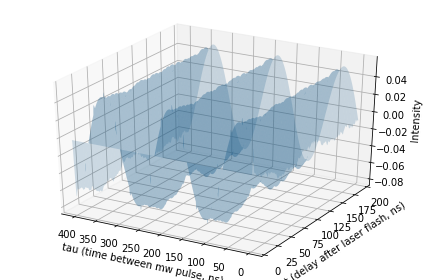

In [2]:
from numpy import size, linspace, zeros, sqrt, cos, pi, sin, arctan
from scipy.stats import norm

# Defintions
beta = 13.996246 ; # Bohr Magneton [MHz/mT]
B0 = 370. ; # Field [mT]
g = np.array([2.002415812641771, 
              2.002222187358229]) ; # g-tensore values (average)
wmw = 9361.1 ; # mw freq [MHz]
tau = linspace(0, 128*pi, num=512) ;# time between pulses (ns)
t = linspace(0, 64*pi, num=512) ;# daf (ns)
J = 0 ; # Heisenberg exchange [mT]
D = 0.5 ; # Dipolar value [mT]
smh = 0.5 ; # Sum of hyperfine [mT]
theta = pi/3 ; #angle between dipolar value

blah = 1000 ; # sampling resolution of gaussian distrubtuion of hyperfine
smhg = norm.rvs(size=blah, scale=smh) #gaussian distribution of hyperfine

Fxmf = np.zeros((size(t),size(tau))) #preallocate
for n in range(blah):
    #theta = n*pi/(blah) # angle between dipolar
    
    E1 = (0.5 * (g[0]+g[1]) * beta * B0 * D/6. * 
    ((3 * cos(theta)**2) -1) + (0.5)*(smhg[n]) - wmw )
    E2 = ((J - D/6. * ((3. * cos(theta)**2) - 1.) +
    sqrt((J + D/6. * ((3. * cos(theta)**2.) - 1.))**2. +
    (0.25) * (beta * B0 * (g[0]-g[1]) + smhg[n])**2) ))
    E3 = ((J - D/6. * ((3. * cos(theta)**2.) - 1.) -
    sqrt((J + D/6. * ((3. * cos(theta)**2) - 1.))**2 +
    (0.25) * (beta * B0 * (g[0]-g[1]) + smhg[n])**2) ))
    E4 = (-0.5 * (g[0]+g[1]) * beta * B0 * D/6. * 
    ((3. * cos(theta)**2) -1.) - (1./2.)*(smhg[n]) + wmw )
    
    E23 = (E3-E2) #/6
    
    p = ((0.5) * arctan(((beta * B0 * (g[0] - g[1])) + 
                    smhg[n])/(2*J +D/3. * (3. * cos(theta)**2 - 1.)))) ;
    Fxm = np.zeros((size(t),size(tau))) # preallocate
    Fx = zeros(size(tau)) ; #preallocate
    Fy = zeros(size(tau)) ; #preallocate
    for i in range(0,size(t)):
        Fx =(( sin(2*p)**2 * cos(2*p) * (cos(E23*t[i]) -1.) *
            ((sin(E23*t[i])*cos((E1+E4-E2-E3)*tau)) +
            (((sin((E1+E4-E2-E3)*tau))) +
            (cos(2*p)*(1-cos(E23*t[i]))))))) ;
        #Fx = Fx * sin(theta) ;
        Fx.shape = (1,512) ;
        Fxm[i,:] = Fx ;
    Fxmf = Fxmf + Fxm ;
Fxmf = Fxmf / blah ;

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

tau.shape = (1, 512)
t.shape = (512, 1)
Fxmf.shape = (512,512)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(tau, t, Fxmf, rstride = 16, cstride = 32, alpha = 0.2)
ax.invert_xaxis()
ax.set_xlabel('tau (time between mw pulse, ns)')
ax.set_ylabel('t (delay after laser flash, ns)')
ax.set_ylim(0, 64*pi)
ax.set_zlabel('Intensity')
plt.tight_layout()

plt.show()

# Bokeh

In [3]:
import bokeh.plotting as bplt
from bokeh.models import ColumnDataSource
import pandas as pd
import numpy as np

In [4]:

df = pd.DataFrame(Fxmf,columns = 
                  [str(blah) for blah in (range(0,512))])


df_tau = pd.DataFrame((np.transpose(Fxmf)),columns = 
                  [str(blah) for blah in (range(512,512*2))])

df = pd.concat([df,df_tau], axis=1, join_axes=[df.index])

df['t'] = pd.DataFrame({'t':t[:,0]})
df['tau'] = pd.DataFrame({'tau':tau[0,:]})

source = ColumnDataSource(df)

TOOLS = ("pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select")

# create a new plot and add a renderer
left = bplt.figure(tools=TOOLS, width=350, height=350, title=None)
left.line(x='t', y=str(0), legend='tau = 0 ns', source=source, color='red', line_width=2, line_alpha=0.4)
left.circle(x='t', y=str(0), source=source, color='red')
left.xaxis.axis_label = ('Time Between Laser Flash and ' + u'\u03bc' +  'wave Pulses (ns)')
left.yaxis.axis_label = 'Intensity (arb. units)'

#create another new plot and add a renderer
right = bplt.figure(tools=TOOLS, width=350, height=350, title=None)
right.line(x='tau', legend='t = 1 ns', y=str(1+512), source=source, color='blue', line_width=2, line_alpha=0.4)
right.circle(x='tau', y=str(1+512), source=source, color='blue')
right.xaxis.axis_label = ('Time Between ' + u'\u03bc' +  'wave Pulses (ns,' + u'\u03c4' + ')')

# # put the subplots in a gridplot
p = bplt.gridplot([[left, right]])

# # show the results
bplt.show(p)
#

# Simplification of experiment simulation

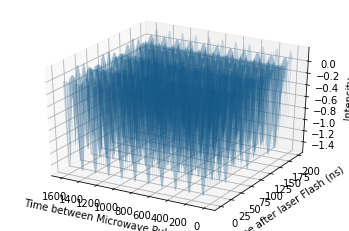

In [5]:
# Defintions
beta = 13.996246 ; #Bohr Magneton [MHz/mT]
B0 = 370. ; # Field [mT]
g = np.array([2.002215812641771, 2.002222187358229]) ; # g-tensore values (average)
theta = pi/3 #arccos(sqrt(1./3.)) #linspace(0, 2*pi, num=512) ;
wmw = 9461.1 ; # mw freq [MHz]
tau = linspace(0, pi*511, num=512) ;# signal (ns)
t = linspace(0, pi*63, num=512) ;# daf (ns)
J = 0 ;# [mT]
D = 0.5 ;# [mT]
smh = 1.5 ;# [mT]
# d = linspace(0, 2*pi, num = 512) # turning angle [radians]
E1 = 0.5 * (g[0]+g[1]) * beta * B0 * D/6. * ((3 * cos(theta)**2) -1) + (0.5)*(smh) - wmw ;
E2 = (J - D/6. * ((3. * cos(theta)**2) - 1.) +
      sqrt((J + D/6. * ((3. * cos(theta)**2.) - 1.))**2. +
      (0.25) * (beta * B0 * (g[0]-g[1]) + smh)**2) ) ;
E3 = (J - D/6. * ((3. * cos(theta)**2.) - 1.) -
      sqrt((J + D/6. * ((3. * cos(theta)**2) - 1.))**2 +
      (0.25) * (beta * B0 * (g[0]-g[1]) + smh)**2) ) ;
E4 = -0.5 * (g[0]+g[1]) * beta * B0 * D/6. * ((3. * cos(theta)**2) -1.) - (1./2.)*(smh) + wmw ;


E23 = E3-E2


p = (0.5) * arctan((beta * B0 * (g[0] - g[1]))/(2*J +D/3. * (3. * cos(theta)**2 - 1.))) ;
Fxm = np.zeros((size(t),size(tau))) # preallocation
Fx = zeros(size(tau));
Fy = zeros(size(tau));
#tau.shape = (1, 128)
#Fx.shape = (1,128)
#t.shape = (512, 1)
for i in range(0,size(t)):
    Fx =( sin(2*p)**2 * cos(2*p) * (cos(E23*t[i]) -1.) * 
        ((sin(E23*t[i])*cos((E1+E4-E2-E3)*tau)) + 
        (((sin((E1+E4-E2-E3)*tau))) + 
        (cos(2*p)*(1-cos(E23*t[i]))))))
    Fx.shape = (1,512)
    Fxm[i,:] = Fx
    
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

tau.shape = (1, 512)
t.shape = (512, 1)
Fxm.shape = (512,512)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(tau, t, Fxm, rstride = 16, cstride = 32, alpha = 0.2)
ax.invert_xaxis()
ax.set_xlabel('Time between Microwave Pulses (ns)')
ax.set_ylabel('Time after laser Flash (ns)')
ax.set_zlabel('Intensity')
plt.show()

# Bokeh for exploring simulation paramaters

In [8]:
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.layouts import row, widgetbox
bplt.output_file("test.html", title='Bokeh demo 1')
df = pd.DataFrame(Fxm,columns = 
                  [str(blah) for blah in (range(0,512))])


df_tau = pd.DataFrame((np.transpose(Fxm)),columns = 
                  [str(blah) for blah in (range(512,512*2))])

df = pd.concat([df,df_tau], axis=1, join_axes=[df.index])

df['t'] = pd.DataFrame({'t':t[:,0]})
df['tau'] = pd.DataFrame({'tau':tau[0,:]})

source = ColumnDataSource(data=dict(x0=df['t'],y0=df['0'],x1=df['tau'],y1=df['513']))

TOOLS = ("pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select")

# create a new plot and add a renderer
left = bplt.figure(tools=TOOLS, width=350, height=350, title=None)
left.line('x0', 'y0', source=source, color='red', line_width=2, line_alpha=0.4)
left.circle('x0', 'y0', source=source, color='red')
left.xaxis.axis_label = ('Time Between Laser Flash and ' + u'\u03bc' +  'wave Pulses (ns)')
left.yaxis.axis_label = 'Intensity (arb. units)'

#create another new plot and add a renderer
right = bplt.figure(tools=TOOLS, width=350, height=350, title=None)
right.line('x1', 'y1', source=source, color='blue', line_width=2, line_alpha=0.4)
right.circle('x1', 'y1', source=source, color='blue')
right.xaxis.axis_label = ('Time Between ' + u'\u03bc' +  'wave Pulses (ns)')

# put the subplots in a gridplot
p = bplt.gridplot([[left, right]])

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var beta = 13.996246;
    var B0 = 370.;
    var wmw = 9461.1;
    var J = J_slider.value;
    var D = D_slider.value;
    var smh = smh_slider.value;
    var theta = Math.PI/3;
    var g1 = g1_slider.value;
    var g2 = g2_slider.value
    x0 = data['x0']
    x1 = data['x1']
    y0 = data['y0']
    y1 = data['y1']
    var E1 = 0.5 * (g1 + g2)/10 * beta * B0 * D/6 * ((3 * Math.cos(theta)**2) -1) + (0.5)*(smh) - wmw ;
    var E2 = (J - D/6 * ((3 * Math.cos(theta)**2) - 1) + Math.sqrt((J + D/6 * ((3 * Math.cos(theta)**2) - 1))**2 + (0.25) * (beta * B0 * (g1 - g2)/10 + smh)**2) ) ;
    var E3 = (J - D/6 * ((3 * Math.cos(theta)**2) - 1) - Math.sqrt((J + D/6 * ((3 * Math.cos(theta)**2) - 1))**2 + (0.25) * (beta * B0 * (g1 - g2)/10 + smh)**2) ) ;
    var E4 = 0.5 * (g1 + g2)/10 * beta * B0 * D/6 * ((3 * Math.cos(theta)**2) -1) - (0.5)*(smh) + wmw  ;
    var E23 = E3 - E2 ;
    var p = (0.5) * Math.atan((beta * B0 * (g1 - g2)/10)/(2*J +D/3. * (3. * Math.cos(theta)**2 - 1.))) ;
    for (i = 0; i < x0.length; i++) {
        y0[i] = ( Math.sin(2*p)**2 * Math.cos(2*p) * (Math.cos(E23)*x0[i]) - 1) * ((Math.sin(E23*x0[i])*Math.cos((E1+E4-E2-E3)*0)) + (((Math.sin((E1+E4-E2-E3)*0)))) + (Math.cos(2*p)*(1-Math.cos(E23*x0[i]))));
    }
    for (i = 0; i < x1.length; i++) {
        y1[i] = ( Math.sin(2*p)**2 * Math.cos(2*p) * (Math.cos(E23)*0.09836689) - 1) * ((Math.sin(E23*0.09836689)*Math.cos((E1+E4-E2-E3)*x1[i])) + (((Math.sin((E1+E4-E2-E3)*x1[i])))) + (Math.cos(2*p)*(1-Math.cos(E23*0.09836689))));
    }
    source.trigger('change');
""")

J_slider = Slider(start=-2, end=2, value=0, step=0.01,
                    title="J-exchange", callback=callback)
callback.args["J_slider"] = J_slider

D_slider = Slider(start=-2, end=2, value=0.5, step=0.02,
                     title="D-dipolar", callback=callback)
callback.args["D_slider"] = D_slider

smh_slider = Slider(start=-5, end=5, value=1.5, step=0.01,
                      title="Smh-sum of hyperfine", callback=callback)
callback.args["smh_slider"] = smh_slider

g1_slider = Slider(start=20.02205, end=20.02232, value=20.02215, step=0.00001,
                       title="g-value 1*10", callback=callback)
callback.args["g1_slider"] = g1_slider

g2_slider = Slider(start=20.02205, end=20.02232, value=20.02222, step=0.00001,
                       title="g-value 2*10", callback=callback)
callback.args["g2_slider"] = g2_slider

layout = row(
    p,
    widgetbox(J_slider, D_slider, smh_slider, g1_slider, g2_slider),
)

bplt.show(layout)
